In [3]:
# Essentials
import pandas as pd
import numpy as np
import json
import os
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt

In [6]:
# working directory
ROOT_DIR = Path(os.path.abspath('')).parent
RESULTS_DIR = os.path.join(ROOT_DIR, "resultfiles", "baselines", "summarization")
print(ROOT_DIR)

C:\Users\HP\Desktop\Tese\Dissertacao\Pratica\Tweet2Story\T2S


In [32]:
def round_up(x):
    return x.apply(lambda x: round(x * 100, 2))

sum_baseline_fscores = pd.read_csv(os.path.join(RESULTS_DIR, "mean_sum_baselines_fscores.csv"))
sum_baseline_fscores.columns = ["baseline", "rouge1", "rouge2", "rougeL", "rougeLsum"]
sum_baseline_fscores[["rouge1", "rouge2", "rougeL", "rougeLsum"]] = sum_baseline_fscores[["rouge1", "rouge2", "rougeL", "rougeLsum"]].apply(round_up)
sum_baseline_fscores

,baseline,rouge1,rouge2,rougeL,rougeLsum
0,LexRank,22.9,6.1,15.7,19.7
1,LSA,21.3,4.6,13.5,17.6
2,TextRank,24.4,6.3,16.0,20.5
3,T5,24.8,6.9,19.0,19.0
4,BART,18.6,4.7,14.3,14.3


In [9]:
sum_baseline_recall = pd.read_csv(os.path.join(RESULTS_DIR, "mean_sum_baselines_recall.csv"))
sum_baseline_recall.columns = ["baseline", "rouge1", "rouge2", "rougeL", "rougeLsum"]
sum_baseline_recall

,baseline,rouge1,rouge2,rougeL,rougeLsum
0,LexRank,0.166,0.044,0.113,0.143
1,LSA,0.153,0.034,0.096,0.126
2,TextRank,0.180,0.045,0.117,0.151
3,T5,0.214,0.059,0.163,0.163
4,BART,0.158,0.040,0.121,0.121


In [10]:
scores = sum_baseline_fscores[["rouge1", "rouge2", "rougeL", "rougeLsum"]]
metric_names = sum_baseline_fscores.columns[1:].tolist()

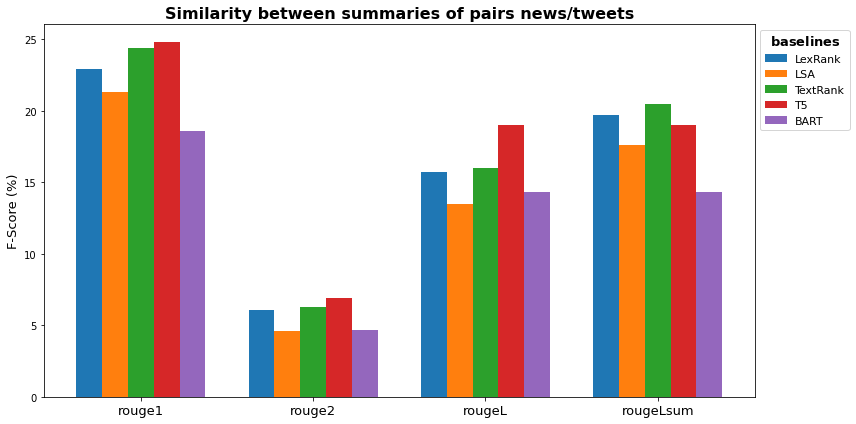

In [33]:
x = np.arange(len(metric_names))
width=0.15

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x - width*2, sum_baseline_fscores.iloc[0, 1:].tolist(), width, label="LexRank")
ax.bar(x - width, sum_baseline_fscores.iloc[1, 1:].tolist(), width, label="LSA")
ax.bar(x, sum_baseline_fscores.iloc[2, 1:].tolist(), width, label="TextRank")
ax.bar(x + width, sum_baseline_fscores.iloc[3, 1:].tolist(), width, label="T5")
ax.bar(x + width*2, sum_baseline_fscores.iloc[4, 1:].tolist(), width, label="BART")

ax.set_title("Similarity between summaries of pairs news/tweets", fontsize=16, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(metric_names, fontsize=13)
ax.set_ylabel("F-Score (%)", fontsize=13)

ax.legend(bbox_to_anchor=(1, 1), title=r"$\bf{baselines}$", title_fontsize=13, fontsize=11)

fig.tight_layout()
plt.show()

# Até que ponto é que podemos obter um sumário a partir dos tweets que seja semelhante ao sumário obtido da notícia

Observado o gráfico, repara-se que os _F-Scores_ para os diferentes modelos relativamente a diferentes métricas são todos __baixos__. Os modelos com melhores resultados ao longo das métricas são o __TextRank__ e o __T5__ e mesmo estes não ultrapassam um F-Score de __0.25__.

Este F-Score __baixo__ que resulta da __comparação entre sumários__ (do artigo e dos tweets) é um indicador de como as baselines de sumariação não conseguem, a partir de um conjunto de tweets relacionados com um evento, fazer um sumário que se assemelhe ao sumário do tópico.

O exemplo seguinte mostra as diferenças entre os dois sumários sobre o primeiro tópico utilizando o modelo __TextRank__:

In [ ]:
# print("Topic Summary:")
# print(baseline_data["TextRank"][0]["single_document"]["topic_summary"])
# print("\nTweets summary:")
# print(baseline_data["TextRank"][0]["single_document"]["tweets_summary"])
# print()

Como seria de esperar, as diferenças são notáveis. O resumo dos tweets tem informações sobre o tópico geral do acontecimento (__hit-and-run__), mas não sobre o evento específico descrito no artigo (__a man hit-and-run a woman in Miami__).

## Resposta:
É possível obter um sumário dos tweets que descreve a notícia, no entanto o modelo terá de __lidar muito bem com ruído__, visto que há muito tweets sobre o tema geral que não são sobre o evento epecífico. As baselines mostram que há muito por onde crescer neste tema, visto que não conseguem produzir um sumário que represente bem a notícia.

# Até que ponto é que podemos obter um sumário a partir dos tweets que seja semelhante à notícia

Neste dataset, é notável que certas notícias são muito difíceis de resumir, devido à especificidade da própria notícia e o facto de não existirem (ou existirem poucos) tweets diretamente relacionados com a mesma.

No entanto, também existem várias notícias (com uma quantidade maior de tweets associados) que são possíveis de se resumir a partir de tweets, como é o exemplo da notícias seguinte.

In [ ]:
# print("Article content:")
# print(tweetir_data.loc[tweetir_data["topic"] == "5811057c-6732-4b37-b04c-ddf0a75a7b51", "topics.content"].unique()[0].replace("  ", "\n"))
# print("Tweets related to article: (relevancy = 2)")
# for text in tweetir_data.loc[(tweetir_data["topic"] == "5811057c-6732-4b37-b04c-ddf0a75a7b51") & (tweetir_data["relevancy"] >= 2), "tweets.full_text"]:
#     print(text)
# print()

A seguinte notícia fala de uma jogadora de golf nova zelandesa de 18 anos que ganhou pela primeira vez o campeonato feminino de golf em Evian na França. <br/>
Como este foi um acontecimento bastante falado, existem __bastantes tweets associados a esta notícia__ e, é possível verificar que a partir dos tweets existentes seria possível obter um resumo que se assemelhasse à notícia.

## Reposta:
__É possível__ obter um sumário dos tweets que seja semelhante à notícia, mas apenas quando temos dados relevantes suficientes.<br/> A existência de ruído é normal, mas algumas notícias têm apenas tweets de ruídos, __para essas não será possível__ obter um resumo. Para as restantes será possível fazê-lo.